In [1]:
import pandas as pd
from glob import glob
import os
import numpy as np

data = "810"

# Import

In [2]:
df = pd.read_parquet(f"/home/gomez/gomez/preds{data}/REL_output/preds.parquet")
df.loc[:,"word_strain_qc"] = df.word_strain_qc.str.replace('/', ' ').str.replace(")", " ").str.replace('_', ' ').str.replace(
                            "(", " ").str.replace("=", " ").str.replace("'", " ").str.replace(";", " ").str.replace(",", " ").str.replace("|", " ").str.replace('.', ' ').str.replace('-', ' ').str.replace('   ', ' ').str.replace('  ', ' ').str.lstrip(' ').str.rstrip(' ')
pred_strains = df.word_strain_qc.to_list()

<Axes: ylabel='Frequency'>

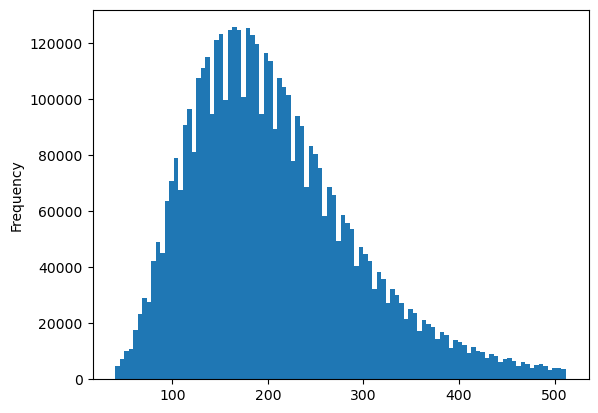

In [3]:
df.text.str.len().plot.hist(bins=100)

In [4]:
folders = glob(f"/home/gomez/gomez/assemblies_linkbert_7/*/")
assemblies = [f.split("/")[-2].replace("_", " ") for f in folders]

## clean assemblies not found in df

In [5]:
len(list(set(assemblies).difference(set(pred_strains))))

0

In [11]:
list(set(assemblies).difference(set(pred_strains)))

['cect 30425',
 'jcm 32045',
 'cpcc 205710',
 'kctc 49742',
 'lmg 31633',
 'cgmcc 1 18820',
 'atcc tsd 174',
 'dsm 17229',
 'ccug 73382',
 'kctc 23554',
 'vkm b 1757',
 'kctc 82901',
 'csur q5893',
 'thiovulum sp',
 'ccug 76175',
 'nbrc 113999',
 'nctc 14451',
 'dsm 29513',
 'doab 1067',
 'cect 30432',
 'nrrl b 65662',
 'kctc 42833',
 'mccc 1a01550',
 'gdmcc 1 2367',
 'dsm 106425',
 'cgmcc 4 7327',
 'ccug 63287',
 'nccb 100920',
 'atcc baa 1156',
 'lmg 24227',
 'dsm 107098',
 'cgmcc 1 12752',
 'csur q8104',
 'vkm ac 2842',
 'dsm 113406',
 'ccug 39680',
 'cgmcc 1 13679',
 'lmg 29017',
 'ccp 78',
 'kctc 82557',
 'jcm 16339',
 'jcm 34111',
 'jcm 18138',
 'sms 303',
 'nbrc 110917',
 'jcm 34027',
 'kctc 49761',
 'nrrl b 65340',
 'dsm 27309',
 'ccp 75',
 'lmg 31921',
 'cect 30129',
 'lmg 32774',
 'brevibacillus sp',
 'ccug 63629',
 'vkm b 3582',
 'cect 30509',
 'lmg 32345',
 'jcm 34406',
 'dsm 102166',
 'tbrc 16203',
 'cpcc 205372',
 'lmg 31649',
 'gdmcc 1 2366',
 'dsm 111878',
 'dsm 16658',

In [11]:
if len(list(set(assemblies).difference(set(df.word_strain_qc.to_list())))) > 0:
	for i in list(set(assemblies).difference(set(df.word_strain_qc.to_list()))):
		print(i)
		os.system(f"rm -rf /home/gomez/gomez/assemblies/{i.replace(' ', '_')}/")

clostridium perfringens str 13
dal * -
tistr 2834
ab *
e. coli *
escherichia coli bl21 *


---

In [6]:
df[df.word_strain.isin(assemblies)].rel.value_counts()

rel
STRAIN-MEDIUM:GROWS_ON            7171
STRAIN-METABOLITE:PRODUCES        6267
STRAIN-PROTEIN:PRODUCES           5745
STRAIN-PHENOTYPE:PRESENTS         5665
STRAIN-ISOLATE:INHABITS           1547
STRAIN-MORPHOLOGY:FORMS            862
STRAIN-METABOLITE:DEGRADES         678
STRAIN-COMPOUND:DEGRADES           481
STRAIN-ORGANISM:INHABITS           451
STRAIN-EFFECT:PROMOTES             429
STRAIN-METABOLITE:RESISTS          424
STRAIN-COMPOUND:RESISTS            416
STRAIN-EFFECT:PRESENTS             164
COMPOUND-STRAIN:INHIBITS           151
STRAIN-DISEASE:ASSOCIATED_WITH     124
STRAIN-ORGANISM:INFECTS             92
STRAIN-SPECIES:INHIBITS             69
METABOLITE-STRAIN:INHIBITS          46
STRAIN-COMPOUND:PRODUCES            27
STRAIN-ORGANISM:SYMBIONT_OF         23
STRAIN-EFFECT:ASSOCIATED_WITH        3
Name: count, dtype: int64

---

# Revise annotations and make new sentences to annotate

remove patterns with strain

In [8]:
network = df[df.word_strain_qc.isin(assemblies)].loc[:,["word_strain_qc","word_qc","rel"]].drop_duplicates(["word_strain_qc","word_qc","rel"])
network.loc[:,"source"] = np.where(network['rel'].str.startswith("STRAIN"), network.word_strain_qc	, network.word_qc)
network.loc[:,"target"] = np.where(network['rel'].str.startswith("STRAIN")==False, network.word_strain_qc, network.word_qc)

network = network.loc[:,["source","target","rel"]]
network.to_csv("network_files/network.csv",index=False,sep="\t")

In [9]:
with open("network_files/strains.txt", "w") as f:
	for s in sorted(set(df[df.word_strain_qc.isin(assemblies)].word_strain_qc.to_list())):
		f.write(f"{s}\n")

In [ ]:
words = ["luria-bertani (", "lb)","co_","γ","c_","seo_3 ^2−−","cr(","pb(","h_","no.","ii)","iii","sb(","growth of", "resistance to","intestinal epithelial barrier functions and immunity","the growth of","tight junctions","root","environment","anthracnose","secondary","contaminants","the release","growth and biocontrol of","improving the growth and development of",") diarrhea","onset","degradation","-induced intestinal barrier dysfunction","the susceptibility to","lungs","sediments of","root nodules of","sputum of","sand of","root surface of","rhizosphere of","fecal sample of","contaminated soil of","hot","song","14-week-old","soil-","lb) broth","lysogeny broth (","bhi)","mrs)","tryptic soy broth (tsb","brain heart infusion (","luria broth (","sheep blood-","tryptic soy agar (","mueller hinton (","man-derosa-sharp","2","1","b","iso-","β","n-","b","h","2-","α-","acetyl-","non","forming rod","s.", "n.", ".","k.","s","a","n","bb","gram-","-", "type i", "free", "host","δ-","beta-","plant-","rod-"]

In [16]:
words = ["mrs)","tryptic soy broth (tsb","brain heart infusion (","luria broth (","sheep blood-","tryptic soy agar (","mueller hinton (","2","1","b","iso-","β","n-","b","h","2-","α-","acetyl-","non","forming rod","s."]
l = []
for i in words:
	l.append(df[df["word_qc"]==i].sample(1).text.to_list())

with open("network_files/rel_to_reannotate.txt","w") as f:
	for s in [i for j in l for i in j]:
		f.write(f"{s}\n")

In [12]:
strains = ["luria-bertani (", "lb)"]
l = []

for i in strains:
	l.append(df[df["word_strain_qc"]==i].sample(1).text.to_list())

with open("network_files/rel_to_reannotate.txt","w") as f:
	for s in [i for j in l for i in j]:
		f.write(f"{s}\n")